In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#pd.set_option('display.max_rows', None)

In [2]:
from collections import Counter
import arabic_reshaper 
from arabic_reshaper import reshape
from bidi.algorithm import get_display
from wordcloud import WordCloud, ImageColorGenerator
from langdetect import detect
from nltk.corpus import stopwords
import re
import nltk
from transformers import pipeline
from scipy.stats import zscore

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-09-23 22:35:41.401138: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Videos

In [213]:
df_videos = pd.read_csv('Fetched-Data/video_stats.csv', index_col=0)
df_videos.head()

video_id                                              title  \
0  TaEuPHkfcS0  Ÿàÿ´ÿßÿ¶ŸÇŸä | ÿ¨ÿ±ÿßÿ¶ŸÖ ÿßŸÑŸÜÿßÿ≤Ÿäÿ© - ÿßÿÆÿ™ÿ∑ÿßŸÅ ÿßŸÑÿ£ÿ∑ŸÅÿßŸÑ | Ÿàÿ´ÿßÿ¶...   
1  ESN_wDg0DUo  Man found guilty in 30-year-old cold case invo...   
2  7_8V-u9WJXY  Asi es como murieron estos asesinos seriales #...   
3  2B4emTu7YUs  El POLIC√çA ARGENTINO que ASESlN√í a su ESPOSA y...   
4  -ETWNxemJWk                    Encore une agression verbale...   

                                         description           publishedAt  \
0  ÿπŸÜÿØŸÖÿß ŸÉÿßŸÜŸàÿß ÿ£ÿ∑ŸÅÿßŸÑŸãÿßÿå ÿßÿÆÿ™ÿ∑ŸÅŸáŸÖ ÿßŸÑŸÜÿßÿ≤ŸäŸàŸÜ ŸÖŸÜ ÿ®ŸàŸÑŸÜÿØ...  2020-04-27T19:00:11Z   
1  Thirty years after single mother Barbara Brodk...  2023-02-25T15:17:49Z   
2                                                NaN  2022-04-07T16:44:56Z   
3  ¬°Hola a todos! \nMi nombre es Mar√≠a y cada sem...  2024-05-13T20:34:27Z   
4  Voil√† ce qu'il s'est pass√© vendredi dernier. E...  2024-05-27T08:28:49Z   

   categoryId  duration                channel_id  nb_comments  nb_views  \
0          27  PT42M27S  UCET6sWl4Xcu-U8Ka9PJPrwA          613    531167   
1          25   PT1M58S  UCxUD8G1jO8T-Ef2tuADCZOA           15      7068   
2          20     PT40S  UCJXiGyoWSDJhIJ1ztB0yChQ         2458   4983804   
3          25  PT22M10S  UCK_-_4AP8QCJLuoVG8mxPMA           97     56634   
4          22   PT1M41S  UCYYIOXsDpE2Zy2rjOClx6nA            0         7   

   nb_likes defaultAudioLanguage                            topicCategories  \
0      5466                   ar  ['https://en.wikipedia.org/wiki/Society']   
1       173                en-CA  ['https://en.wikipedia.org/wiki/Society']   
2    354463                  NaN                                        NaN   
3      3171                   es  ['https://en.wikipedia.org/wiki/Society']   
4         1                  NaN  ['https://en.wikipedia.org/wiki/Society']   

        topics  del date_published time_published duration_time  \
0  ['Society']   No     2020-04-27       19:00:11      00:42:27   
1  ['Society']   No     2023-02-25       15:17:49      00:01:58   
2          NaN  NaN     2022-04-07       16:44:56      00:00:40   
3  ['Society']   No     2024-05-13       20:34:27      00:22:10   
4  ['Society']   No     2024-05-27       08:28:49      00:01:41   

        categories Language  
0        Education       ar  
1  News & Politics    en-CA  
2           Gaming       es  
3  News & Politics       es  
4   People & Blogs       fr

In [214]:
df_video = df_videos.drop(['categoryId','duration','defaultAudioLanguage','topicCategories','del'], axis=1)
df_video.columns

Index(['video_id', 'title', 'description', 'publishedAt', 'channel_id',
       'nb_comments', 'nb_views', 'nb_likes', 'topics', 'date_published',
       'time_published', 'duration_time', 'categories', 'Language'],
      dtype='object')

In [215]:
df_video.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2707 entries, 0 to 2706
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   video_id        2707 non-null   object
 1   title           2707 non-null   object
 2   description     2502 non-null   object
 3   publishedAt     2707 non-null   object
 4   channel_id      2707 non-null   object
 5   nb_comments     2707 non-null   int64 
 6   nb_views        2707 non-null   int64 
 7   nb_likes        2707 non-null   int64 
 8   topics          2508 non-null   object
 9   date_published  2707 non-null   object
 10  time_published  2707 non-null   object
 11  duration_time   2707 non-null   object
 12  categories      2688 non-null   object
 13  Language        2707 non-null   object
dtypes: int64(3), object(11)
memory usage: 317.2+ KB


In [217]:
df_video.describe()

nb_comments      nb_views      nb_likes
count   2707.000000  2.707000e+03  2.707000e+03
mean     520.299224  6.132304e+05  9.781888e+03
std     1691.668924  2.550501e+06  4.336908e+04
min        0.000000  0.000000e+00  0.000000e+00
25%        5.000000  6.834000e+03  8.200000e+01
50%       54.000000  3.818600e+04  6.000000e+02
75%      294.500000  2.225940e+05  3.946500e+03
max    35012.000000  4.453565e+07  1.167024e+06

**Convert types**

In [242]:
# Convert publish date to datetime
df_video['publishedAt'] = pd.to_datetime(df_video['publishedAt'])

**Clean the Language column**

In [243]:
df_video['Language'] = (
    df_video['Language']
    .str.split('-')
    .str[0]  # Get the part before the hyphen
    .str.lower()  # Convert to lowercase
)

**Views and Likes Analysis**

 Investigate how the number of likes correlates with the number of views

Text(0.5, 1.0, 'Video Likes vs. Video Views')

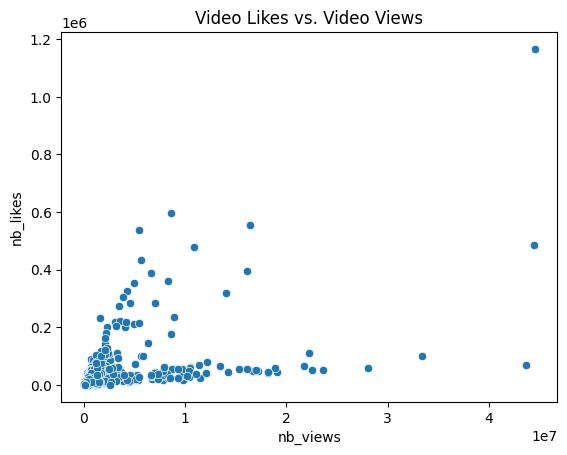

In [222]:
sns.scatterplot(data=df_video, x='nb_views', y='nb_likes')
plt.title('Video Likes vs. Video Views')


**Comments Analysis**

Analyze how the number of comments varies with views and likes

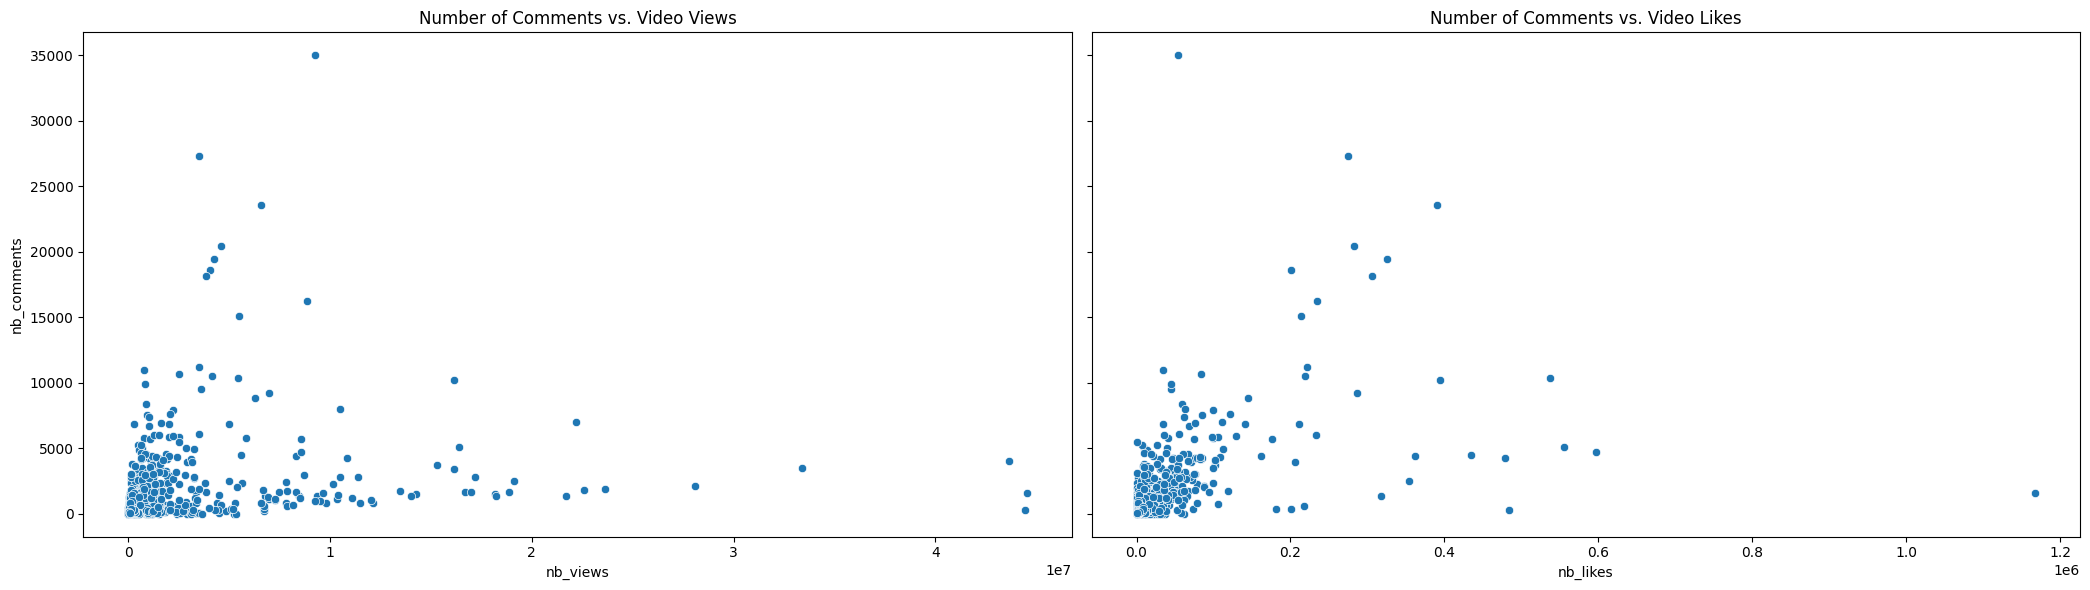

In [227]:
# Create subplots - 1 column, 3 rows
fig, axes = plt.subplots(1, 2, figsize=(21, 6), sharey=True)

sns.scatterplot(ax=axes[0], data=df_video, x='nb_views', y='nb_comments')
axes[0].set_title('Number of Comments vs. Video Views')

sns.scatterplot(ax=axes[1], data=df_video, x='nb_likes', y='nb_comments')
axes[1].set_title('Number of Comments vs. Video Likes')

# Adjust layout
plt.tight_layout()
plt.show()



**Temporal Analysis**

Video Upload Trends: Analyze the trend of video uploads over time.

/var/folders/v3/vzv7hgws4w50m44vnrtb6py80000gn/T/ipykernel_4427/561399272.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_trends = df_video.resample('Y', on='publishedAt').size()


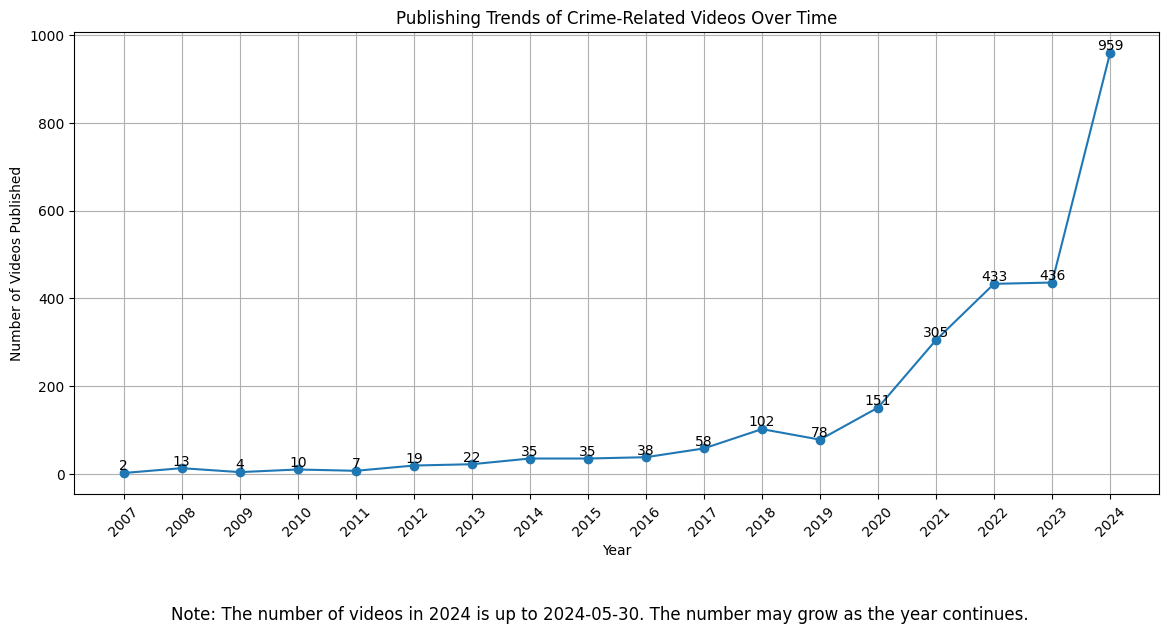

In [235]:
# Group by month and count number of videos
yearly_trends = df_video.resample('Y', on='publishedAt').size()

# Find the last date in the DataFrame
last_date = df_video['publishedAt'].max()

# Create the comment about 2024
comment = f"Note: The number of videos in 2024 is up to {last_date.date()}. The number may grow as the year continues."

# Plotting
plt.figure(figsize=(14, 6))
plt.plot(yearly_trends.index.year, yearly_trends.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Videos Published')
plt.title('Publishing Trends of Crime-Related Videos Over Time')
plt.grid(True)
plt.xticks(yearly_trends.index.year, rotation=45)

# Add values on the plot
for x, y in zip(yearly_trends.index.year, yearly_trends.values):
    plt.text(x, y, str(y), ha='center', va='bottom')

# Add the comment to the plot
plt.figtext(0.5, -0.1, comment, wrap=True, horizontalalignment='center', fontsize=12)

plt.show()


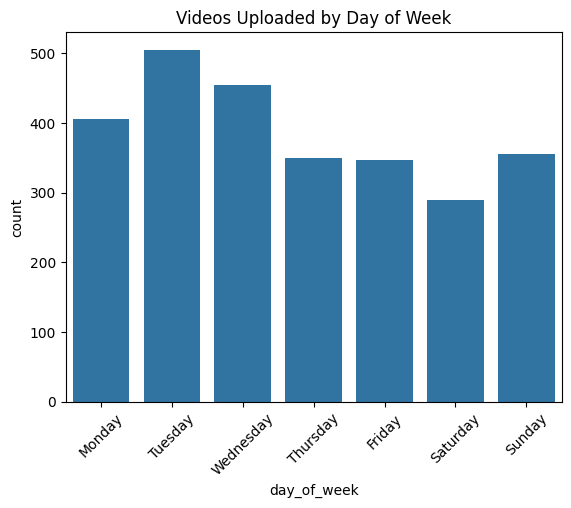

In [233]:
df_video['day_of_week'] = df_video['publishedAt'].dt.day_name()
sns.countplot(data=df_video, x='day_of_week', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Videos Uploaded by Day of Week')
plt.xticks(rotation=45)
plt.show()


**Language Preferences**

Analyze how video language correlates with number videos, views, comments, and likes.

In [244]:
# Count of languages used by channels
language_counts_vid = df_video['Language'].value_counts()

# Select the top 10 languages
top_languages_vid = language_counts_vid[:6]

# Group the rest into 'Other'
top_languages_vid['Other'] = language_counts_vid[6:].sum()

# Plotting
plt.figure(figsize=(8, 8))
plt.pie(top_languages_vid, labels=top_languages_vid.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Total Videos by Language')
plt.show()


/var/folders/v3/vzv7hgws4w50m44vnrtb6py80000gn/T/ipykernel_4427/1855242672.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/v3/vzv7hgws4w50m44vnrtb6py80000gn/T/ipykernel_4427/1855242672.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/v3/vzv7hgws4w50m44vnrtb6py80000gn/T/ipykernel_4427/1855242672.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


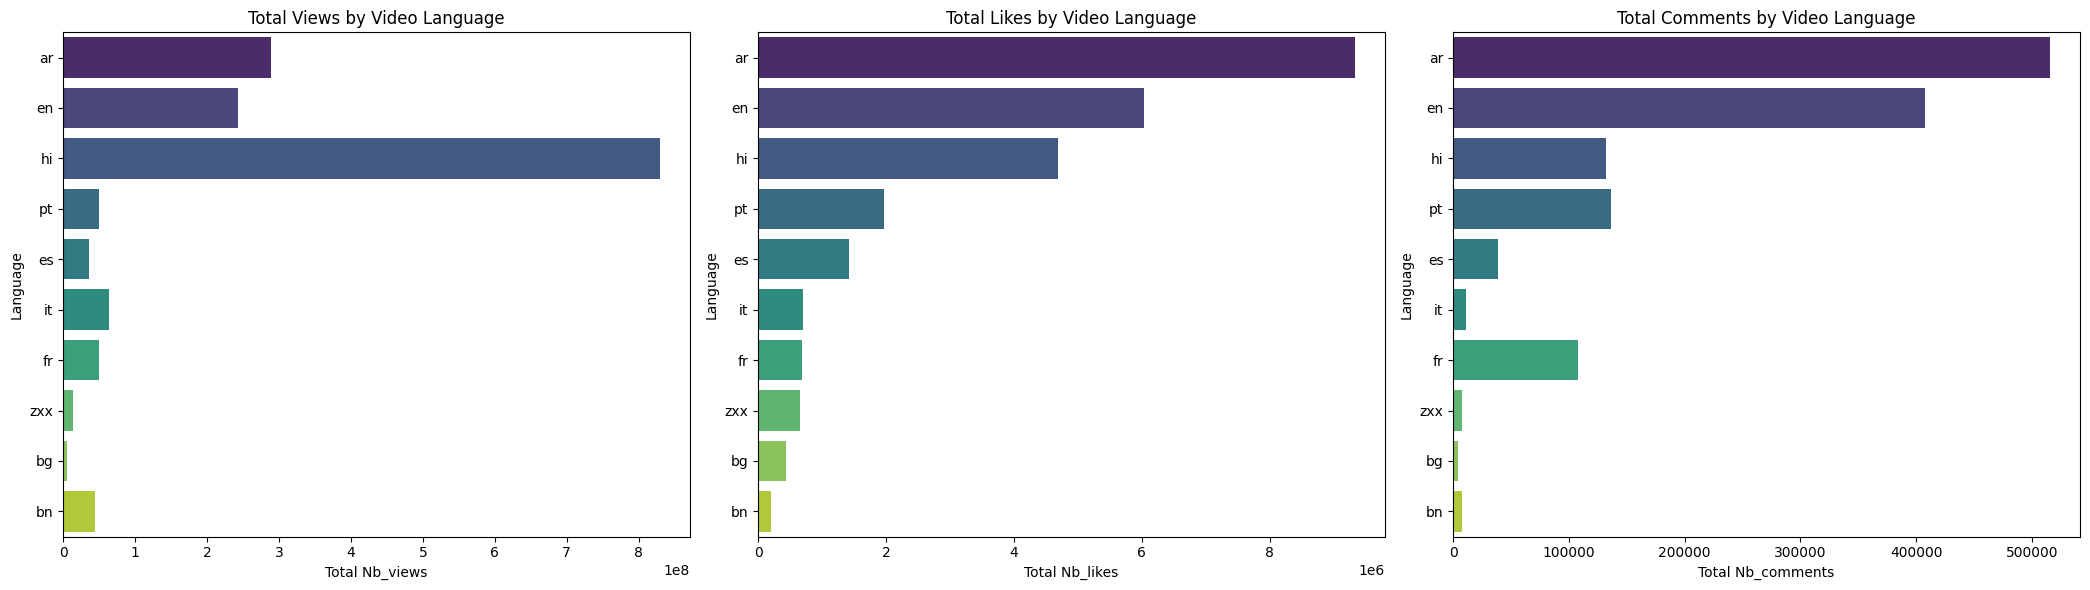

In [248]:
# Group by language and calculate total engagement metrics
language_metrics = df_video.groupby('Language').agg({
    'nb_views': 'sum',
    'nb_likes': 'sum',
    'nb_comments': 'sum'
}).reset_index()

language_metrics = language_metrics.sort_values('nb_likes', ascending=False)[:10]

# Reshape the data to a long format for better plotting with Seaborn
language_metrics_long = pd.melt(
    language_metrics, 
    id_vars=['Language'], 
    value_vars=['nb_views', 'nb_likes', 'nb_comments'],
    var_name='Metric', 
    value_name='Total Value'
)

fig, axes = plt.subplots(1, 3, figsize=(21, 6), sharex=False)

# Define the metrics to plot
metrics = ['nb_views', 'nb_likes', 'nb_comments']
titles = ['Total Views by Video Language', 'Total Likes by Video Language', 'Total Comments by Video Language']

# Plot each metric separately
for i, metric in enumerate(metrics):
    sns.barplot(
        ax=axes[i],
        x='Total Value', 
        y='Language', 
        data=language_metrics_long[language_metrics_long['Metric'] == metric],
        palette='viridis'
    )
    axes[i].set_title(titles[i])
    axes[i].set_xlabel('Total ' + metric.capitalize())
    axes[i].set_ylabel('Language')

# Adjust layout
plt.tight_layout()
plt.show()

**Keyword and Tag Analysis**

Identifying common keywords, tags, or phrases used in titles. Visualizing with word clouds.

In [249]:
font_file = 'arabic_process/DejaVuSans.ttf'
path_ar = "arabic_process/arabic_dialects_stopwords.csv"

# Function to detect language safely
def detect_language(text):
    try:
        return detect(text)
    except:
        return 'unknown'
    
# Detect language of each title
df_video['lang_title'] = df_video['title'].apply(lambda x: detect_language(x))


# Download stopwords from NLTK 
nltk.download('stopwords')

# Load predefined stopwords
stopwords_en = set(stopwords.words('english'))
stopwords_fr = set(stopwords.words('french'))

# Load Arabic stopwords from your file (assuming one word per line)
with open(path_ar, 'r', encoding='utf-8') as f:
    stopwords_ar = set([line.strip() for line in f])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/macbook/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Function to preprocess text based on language
def preprocess_text(text, lang):
    # Define stopwords for each language
    stopwords_dict = {
        'en': stopwords_en,
        'fr': stopwords_fr,
        'ar': stopwords_ar,
    }

    # Remove punctuation, numbers, and normalize text
    cleaned_text = re.sub(r'[^A-Za-z\u0600-\u06FF\s]', '', text)

    # Remove stopwords specific to language
    words = cleaned_text.lower().split()
    filtered_words = [word for word in words if word not in stopwords_dict.get(lang, set())]

    # If Arabic, reshape and apply bidi algorithm
    if lang == 'ar':
        reshaped_text = reshape(' '.join(filtered_words))
        return get_display(reshaped_text)
    else:
        return ' '.join(filtered_words)

# Preprocess titles based on detected language
df_video['processed_title'] = df_video.apply(lambda row: preprocess_text(row['title'], row['lang_title']), axis=1)

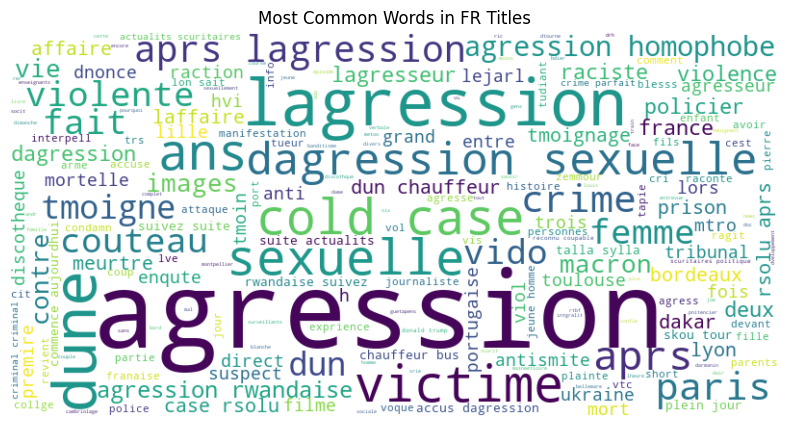

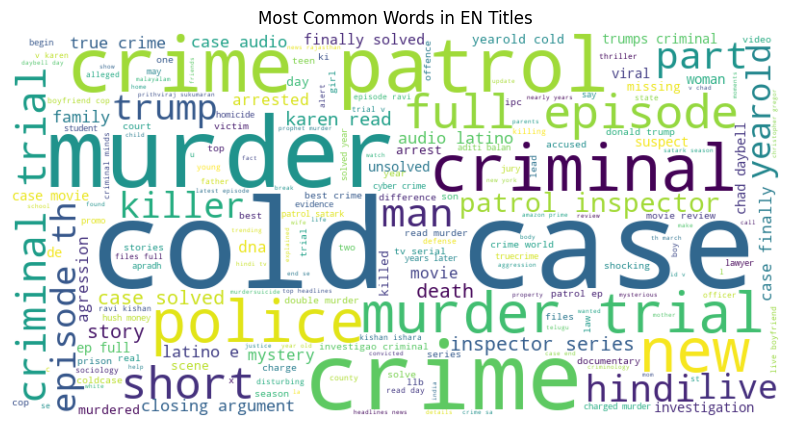

In [31]:
# Separate DataFrames by language
languages = ['ar','fr','en']

# Visualize word clouds for each language
for lang in languages:

    lang_df = df_video[df_video['lang_title'] == lang]
    all_titles = ' '.join(lang_df['processed_title'].dropna().tolist())

    # Generate and plot word cloud
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        font_path=font_file if lang == 'ar' else None  # Adjust font for Arabic if needed
    ).generate(all_titles)

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Most Common Words in {lang.upper()} Titles')
    plt.show()

**Calculate z-scores for the view count to identify outliers**

In [95]:
df_video['view_zscore'] = zscore(df_video['nb_views'])
# Identify outliers where z-score is beyond a typical threshold, e.g., > 3 or < -3
outliers = df_video[(df_video['view_zscore'] > 3) | (df_video['view_zscore'] < -3)]
outliers[['title', 'nb_views', 'view_zscore']].head()


title  nb_views  view_zscore
70    Crime Patrol - ‡§ï‡•ç‡§∞‡§æ‡§á‡§Æ ‡§™‡•á‡§ü‡•ç‡§∞‡•ã‡§≤ ‡§∏‡§§‡§∞‡•ç‡§ï - Episode ...   9790867     3.599031
77    They found a Potential Murder Hideout.. #crime...  10819506     4.002414
187   Intervista a un boss di camorra - Kings of Cri...   8698541     3.170673
194   Crime Patrol - ‡§ï‡•ç‡§∞‡§æ‡§á‡§Æ ‡§™‡•á‡§ü‡•ç‡§∞‡•ã‡§≤ ‡§∏‡§§‡§∞‡•ç‡§ï - Taxi - E...  10353319     3.819598
210                                        Crime Petrol  44445392    17.188882
278   Crime Patrol - ‡§ï‡•ç‡§∞‡§æ‡§á‡§Æ ‡§™‡•á‡§ü‡•ç‡§∞‡•ã‡§≤ ‡§∏‡§§‡§∞‡•ç‡§ï - Asambhav...  19106268     7.252087
300   Crime Patrol Dial 100 - Ep 766 - Full Episode ...  13454850     5.035870
378   Crime Patrol Dial 100 - ‡§ï‡•ç‡§∞‡§æ‡§á‡§Æ ‡§™‡•á‡§ü‡•ç‡§∞‡•ã‡§≤- Ep 414...  18865378     7.157621
535   Crime Patrol - ‡§ï‡•ç‡§∞‡§æ‡§á‡§Æ ‡§™‡•á‡§ü‡•ç‡§∞‡•ã‡§≤ ‡§∏‡§§‡§∞‡•ç‡§ï - Dahleez ...  23630079     9.026110
622   Crime Patrol - ‡§ï‡•ç‡§∞‡§æ‡§á‡§Æ ‡§™‡•á‡§ü‡•ç‡§∞‡•ã‡§≤ ‡§∏‡§§‡§∞‡•ç‡§ï - Ep 792- ...   8467761     3.080172
635                 Did this prankster commit a crime?Ôøº   8332715     3.027213
652                            ÿ¨ÿ±ÿßÿ¶ŸÖ ÿ£ŸÖÿ±ŸäŸÉÿß ŸÅŸä ÿßŸÑÿπÿ±ÿßŸÇ!!   8570105     3.120306
677   Intoxicated murderer visits crime scene, talks...  16128882     6.084498
691   Crime Patrol Dastak - False Pride - Episode 34...  15320792     5.767604
721   // ‡§õ‡•ã‡§ü‡•Ä ‡§Ö‡§µ‡§∏‡•ç‡§•‡§æ ‡§Æ‡•á‡§Ç ‡§Æ‡•á‡§∞‡•á ‡§¨‡§ö‡•ç‡§ö‡•á ‡§ï‡•ã ‡§ï‡•à‡§Ç‡§∏‡§∞ ‡§π‡•ã ‡§ó‡§Ø‡§æ,...   8572921     3.121411
886   Crime Patrol - Gauri Disagrees To Stay With Ra...  22207414     8.468208
1053  Crime Patrol - ‡§ï‡•ç‡§∞‡§æ‡§á‡§Æ ‡§™‡•á‡§ü‡•ç‡§∞‡•ã‡§≤ ‡§∏‡§§‡§∞‡•ç‡§ï - Backstab...   9368813     3.433522
1223  Crime Patrol Satark Season 2 - Ep 279 - Full E...   9669662     3.551500
1241  Crime Patrol Dastak - Ep 993 - Full Episode - ...  11403550     4.231448
1260  Crime Patrol - ‡§ï‡•ç‡§∞‡§æ‡§á‡§Æ ‡§™‡•á‡§ü‡•ç‡§∞‡•ã‡§≤ ‡§∏‡§§‡§∞‡•ç‡§ï - Ep 776 -...  18203161     6.897931
1285                Crime Patrol - Bengali - Episode 77  21688522     8.264724
1341  Crime Patrol - ‡§ï‡•ç‡§∞‡§æ‡§á‡§Æ ‡§™‡•á‡§ü‡•ç‡§∞‡•ã‡§≤ ‡§∏‡§§‡§∞‡•ç‡§ï - Ep 844 -...  17170231     6.492865
1372  Crime Patrol - ‡§ï‡•ç‡§∞‡§æ‡§á‡§Æ ‡§™‡•á‡§ü‡•ç‡§∞‡•ã‡§≤ ‡§∏‡§§‡§∞‡•ç‡§ï - Ep 820 -...   8329857     3.026093
1386  ‡§ó‡§π‡§∞‡•Ä ‡§∏‡§æ‡•õ‡§ø‡§∂ ‡§ï‡§æ ‡§Æ‡•Å‡§ú‡§∞‡§ø‡§Æ ‡§ñ‡•Å‡§¶ ‡§π‡•Å‡§Ü ‡§∂‡§ø‡§ï‡§æ‡§∞ | Crime Pat...  12153945     4.525717
1466  Crime Patrol - ‡§ï‡•ç‡§∞‡§æ‡§á‡§Æ ‡§™‡•á‡§ü‡•ç‡§∞‡•ã‡§≤ ‡§∏‡§§‡§∞‡•ç‡§ï - Ep 795 -...  10515552     3.883218
1524  Crime Patrol - ‡§ï‡•ç‡§∞‡§æ‡§á‡§Æ ‡§™‡•á‡§ü‡•ç‡§∞‡•ã‡§≤ ‡§∏‡§§‡§∞‡•ç‡§ï - Ep 811 -...  22566786     8.609137
1583  SOLVED 21 Year Old Missing Persons Case (Erin ...   8857751     3.233108
1627  Crime Patrol - ‡§ï‡•ç‡§∞‡§æ‡§á‡§Æ ‡§™‡•á‡§ü‡•ç‡§∞‡•ã‡§≤ ‡§∏‡§§‡§∞‡•ç‡§ï - Case 6 /...   8518331     3.100003
1643  Crime Patrol - ‡§ï‡•ç‡§∞‡§æ‡§á‡§Æ ‡§™‡•á‡§ü‡•ç‡§∞‡•ã‡§≤ ‡§∏‡§§‡§∞‡•ç‡§ï - Antarhee...  11472524     4.258497
1767  Crime Patrol Dial 100 - ‡§ï‡•ç‡§∞‡§æ‡§á‡§Æ ‡§™‡•á‡§ü‡•ç‡§∞‡•ã‡§≤ - Daag ...  33416626    12.863926
1785  Crime Patrol - ‡§ï‡•ç‡§∞‡§æ‡§á‡§Æ ‡§™‡•á‡§ü‡•ç‡§∞‡•ã‡§≤ ‡§∏‡§§‡§∞‡•ç‡§ï -  Hisaab ...  18211933     6.901371
1796  Crime Patrol - ‡§ï‡•ç‡§∞‡§æ‡§á‡§Æ ‡§™‡•á‡§ü‡•ç‡§∞‡•ã‡§≤ ‡§∏‡§§‡§∞‡•ç‡§ï - An Escap...   9511577     3.489507
1871  Crime Patrol - ‡§ï‡•ç‡§∞‡§æ‡§á‡§Æ ‡§™‡•á‡§ü‡•ç‡§∞‡•ã‡§≤ ‡§∏‡§§‡§∞‡•ç‡§ï - Ep 829 -...  28067619    10.766301
1967  Crime Patrol - ‡§ï‡•ç‡§∞‡§æ‡§á‡§Æ ‡§™‡•á‡§ü‡•ç‡§∞‡•ã‡§≤ ‡§∏‡§§‡§∞‡•ç‡§ï - Case 7 /...  16689030     6.304161
2031  Crime Patrol - ‡§ï‡•ç‡§∞‡§æ‡§á‡§Æ ‡§™‡•á‡§ü‡•ç‡§∞‡•ã‡§≤ ‡§∏‡§§‡§∞‡•ç‡§ï - Ep 779 -...  16981048     6.418677
2097  Crime Patrol - Ep 881 - Full Episode - 24th De...  10503806     3.878612
2144  Crime Patrol - ‡§ï‡•ç‡§∞‡§æ‡§á‡§Æ ‡§™‡•á‡§ü‡•ç‡§∞‡•ã‡§≤ ‡§∏‡§§‡§∞‡•ç‡§ï - Ep 786 -...  16133873     6.086455
2231  Crime Patrol - ‡§ï‡•ç‡§∞‡§æ‡§á‡§Æ ‡§™‡•á‡§ü‡•ç‡§∞‡•ã‡§≤ ‡§∏‡§§‡§∞‡•ç‡§ï - Episode ...   9252577     3.387939
2252  Crime Patrol - Discontented - Episode 412 - 5t

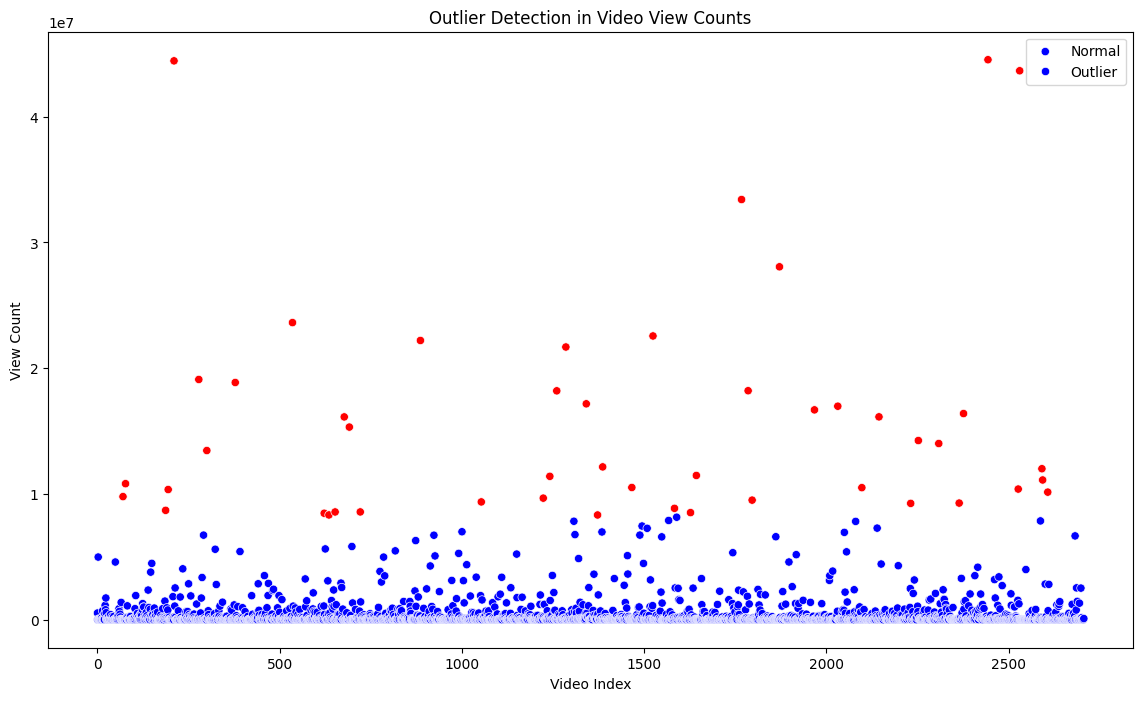

In [100]:
# Scatter plot to visualize outliers
plt.figure(figsize=(14, 8))
sns.scatterplot(x=range(len(df_video)), y='nb_views', data=df_video, hue=(df_video['view_zscore'].abs() > 3), palette={True: 'red', False: 'blue'})
plt.xlabel('Video Index')
plt.ylabel('View Count')
plt.title('Outlier Detection in Video View Counts')
plt.legend(['Normal', 'Outlier'])
plt.show()
